# <center> Disney Studio Income Analysis

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files 

In [ ]:
upload=files.upload()

Saving disney_movies.csv to disney_movies (2).csv


In [ ]:
df=pd.read_csv('disney_movies.csv')

## Task 1: Data Exploration

Checking Null Values , release_date into datatime , best & worst total gross

In [ ]:
#CHECKING NULL VALUES
df.isnull().sum()

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

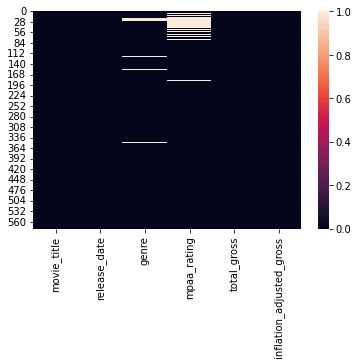

In [ ]:
sns.heatmap(df.isnull())


Data have null vales in genre and mpaa_rating.

In [ ]:
#CONVERTING RELEASE_DATE INTO DATE TIME
df['release_date'] = pd.to_datetime(df['release_date'])

In [ ]:
df['year'] = df['release_date'].dt.date.astype(str).str.split('-', expand=True)[0]

In [ ]:
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950


In [ ]:
#BEST & WORST TOTAL GROSS

print('The best total gross:', df['total_gross'].max(),
      '\nThe worse total gross:', df['total_gross'].min())

The best total gross: 936662225 
The worse total gross: 0


## Task 2: Visualize Year Distribution Plot

In [ ]:
df['year'] = df['release_date'].dt.date.astype(str).str.split('-', expand=True)[0]

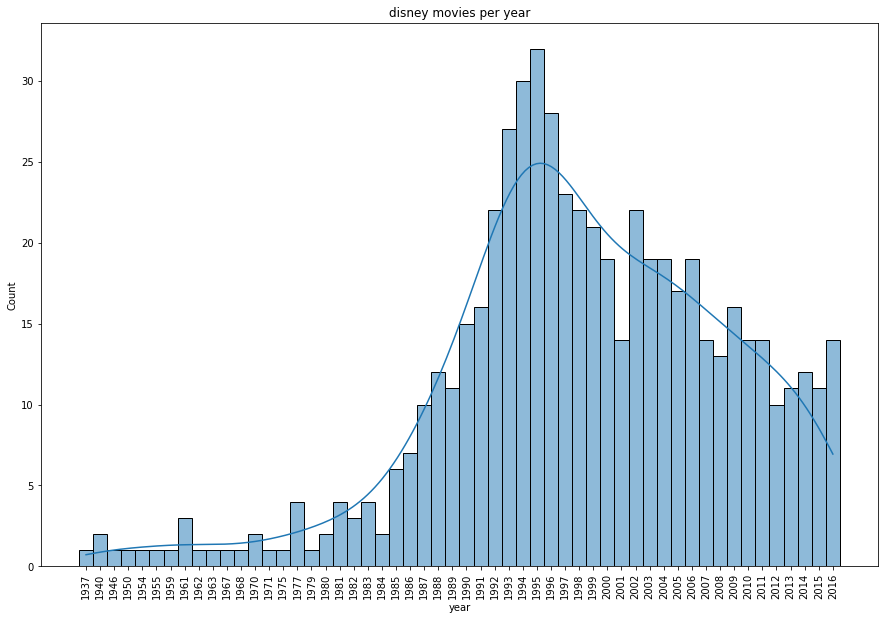

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.title('disney movies per year')
sns.histplot(df['year'], kde=True)

## Task 3: Does Movies Income Decreased or Increased?

In [ ]:
year_income = df.groupby('year').sum()

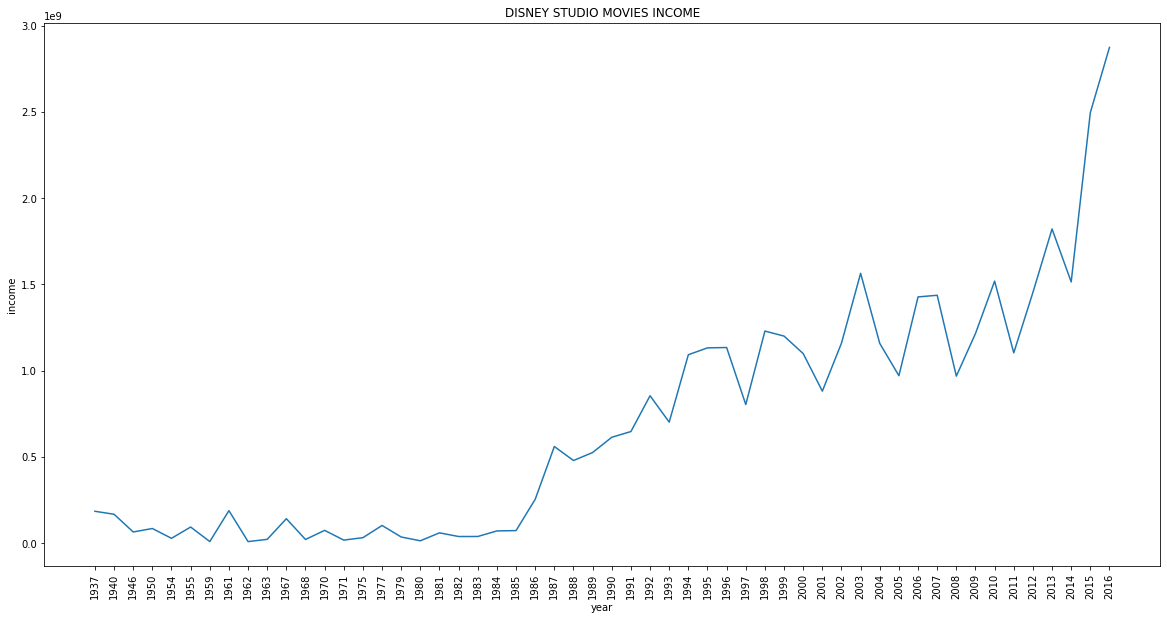

In [ ]:
plt.figure(figsize=(20, 10))
plt.title('DISNEY STUDIO MOVIES INCOME')
plt.xlabel('year')
plt.ylabel('income')
plt.xticks(rotation=90)
sns.lineplot(x=year_income.index, y=year_income['total_gross'])

## Task 4: Describe the total counts of Genres

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


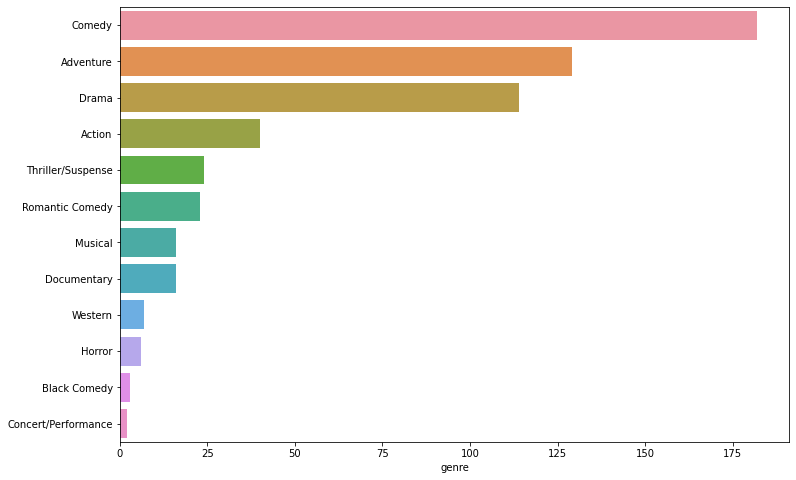

In [ ]:
plt.figure(figsize=(12,8))
genre= df['genre'].value_counts()
sns.barplot(genre,genre.index)